Solution to KNN lab
==

## Simon Rogers, Feb 2017

In [4]:
import numpy as np
import pylab as plt
%matplotlib inline

Load the data

In [5]:
traindata = np.loadtxt('trainx.csv',delimiter=',')
testdata = np.loadtxt('testx.csv',delimiter=',')
trainX = traindata[:,:2]
traint = traindata[:,2]
testX = testdata[:,:2]
testt = testdata[:,2]
print(trainX.shape)

(100, 2)


Plot the training data by class

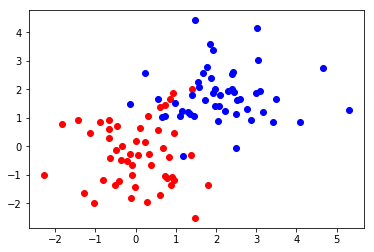

In [6]:
classes = {0:'ro',1:'bo'}
plt.figure()
for cl in classes:
    pos = np.where(traint == cl)[0]
    plt.plot(trainX[pos,0],trainX[pos,1],classes[cl])

Write a KNN function for a single test example (a row)

In [7]:
# Why do we need to specify a test row?
def knn_classifier(trainX, traint, testrow, K=3):
    distances = ((trainX - testrow)**2).sum(axis=1)
    dc = zip(distances,traint)
    dc = sorted(dc,key = lambda x:x[0])
    classes = []
    votes = []
    for k in range(K):
        this_class = dc[k][1] # get the class of the kth ranked
        if not this_class in classes:
            classes.append(this_class)
            votes.append(1)
        else:
            index = classes.index(this_class)
            votes[index] += 1
    best_class = classes[0]
    best_vote = votes[0]
    pos = 1
    for cl in classes[1:]:
        if votes[pos] > best_vote:
            best_vote = votes[pos]
            best_class = cl
        pos += 1
    return best_class
    

Test with a test point

In [8]:
test_index = 150
c = knn_classifier(trainX,traint,testX[test_index,:],K=8)
print(c)

1.0


In [20]:
Kvals = np.arange(1,100,2)
accuracy = []
for k in Kvals:
    correct = 0
    for i,row in enumerate(testX):
        c = knn_classifier(trainX,traint,row,K=k)
        if c == testt[i]:
            correct += 1
    accuracy.append(1.0*correct / (1.0*len(testX)))
    

Plot the results

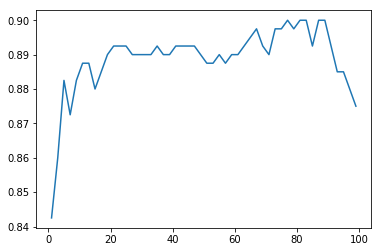

In [16]:
plt.figure()
plt.plot(Kvals,accuracy)